In [1]:
from scipy.stats import beta
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np
%matplotlib inline

In [2]:
# Settings
im = list(np.logspace(-3, np.log10(2), num=100))
c = list(np.geomspace(0.02, 380, num=200))

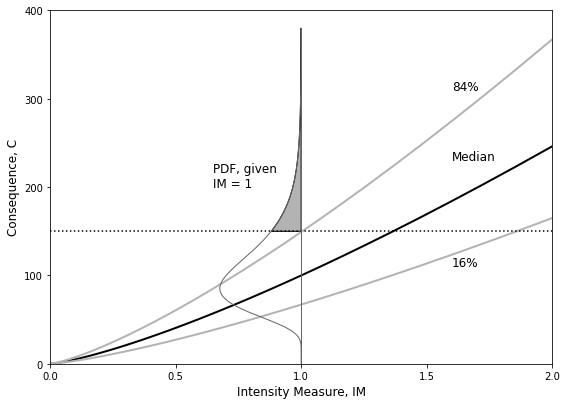

In [3]:
# Power-law vulnerability
a = 100
b = 1.3
betaIM = 0.4
medianC = a * np.power(im, b)

# PDF
imLevel = 1. # example IM of interest
cLevel = 150 # cost threshold of interest

c = [cLevel] + c # include this specific threshold in the consequence vector, for help with plot
c.sort()
pdfSF = 30 # scale factor to apply to PDF in figure (to size it appropriately for plotting)
pdfC = lognorm.pdf(c, betaIM, loc=0, scale=a * imLevel ** b) 

probOfExceed = 1 - lognorm.cdf(cLevel, betaIM, loc=0, scale=a * imLevel ** b) # numerical probability of shaded area

# Patch of PDF exceedance area
idx = c.index(cLevel)
idxLen = len(c) - idx 
patchxmid = np.array([imLevel]*idxLen) - (pdfSF * pdfC[idx:])
patchX = [imLevel] + patchxmid.tolist() +[imLevel] # x value for PDF patch
patchY = [cLevel] + c[idx:] + [cLevel]

# Plot Fig 9.3
fig,ax=plt.subplots(1)
fig.set_size_inches(9,6.5)
ax.plot(im, medianC, 'k-', linewidth=2)
ax.plot(im, medianC*np.exp(betaIM), linestyle='-', linewidth=2, color=[0.7,0.7,0.7])
ax.plot(im, medianC/np.exp(betaIM), linestyle='-', linewidth=2, color=[0.7,0.7,0.7])
ax.plot(im, [cLevel]*len(im), ':k') 
ax.plot([imLevel]*len(c) - pdfSF*pdfC, c, linestyle='-', linewidth=1, color=[0.4,0.4,0.4])
ax.plot([imLevel]*len(c), c, linestyle='-', linewidth=1, color=[0.4,0.4,0.4])

path = Path(np.array((patchX, patchY)).T)
patch = patches.PathPatch(path, facecolor=[0.7,0.7,0.7], edgecolor='k')
ax.add_patch(patch)

ax.text(1.6, 230, 'Median', fontsize=12)
ax.text(1.6, 310, '84%', fontsize=12)
ax.text(1.6, 110, '16%', fontsize=12)
ax.text(0.65, 200, 'PDF, given \nIM = 1', fontsize=12)
ax.set_xlim(0, 2)
ax.set_ylim(0, 400)
ax.set_xticks(np.arange(0, 2.5, step = 0.5))
ax.set_yticks(np.arange(0, 500, step = 100))
ax.set_xlabel('Intensity Measure, IM', fontsize=12)
ax.set_ylabel('Consequence, C', fontsize=12)
plt.show()


(0.0, 6.0)

<Figure size 432x288 with 0 Axes>

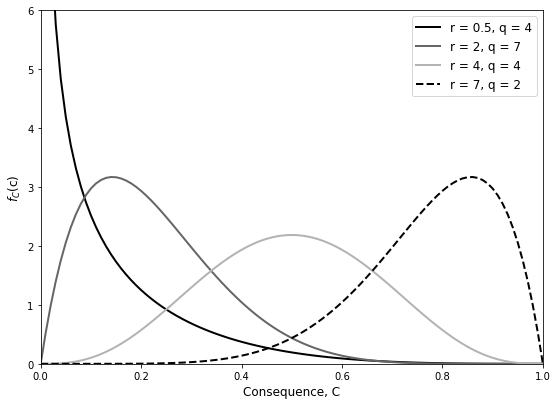

In [4]:
# Beta distribution vulnerability

# consequence values
x = np.linspace(0, 1, 101)

# parameter values
r = [0.5, 2, 4, 7, 4]
q = [4, 7, 4, 2, 0.5]

# Plot Fig 9.4

# linestyles
colorspec = {}
colorspec[0] = [0 ,0, 0]
colorspec[1] = [0.4, 0.4, 0.4]
colorspec[2] = [0.7, 0.7, 0.7]
colorspec[3] = [0 ,0, 0]

linespec = {}
linespec[0] = '-'
linespec[1] = '-'
linespec[2] = '-'
linespec[3] = '--'

f_x = []
labels = {}
for i in range(4):
    f_x.append(beta.pdf(x, r[i], q[i]))
    labels[i] = 'r = ' + str(r[i]) + ', q = ' + str(q[i])

plt.figure(2) 
plt.figure(figsize=(9, 6.5))
for i in range(4):
    plt.plot(x, f_x[i], linestyle=linespec[i], linewidth=2, color=colorspec[i], label=labels[i])
plt.xlabel('Consequence, C', fontsize=12)
plt.ylabel('$f_C$(c)', fontsize=12)
plt.legend(loc='upper right', fontsize=12)    
plt.xlim(0, 1)
plt.ylim(0, 6)


Text(0, 0.5, 'Probability')

<Figure size 432x288 with 0 Axes>

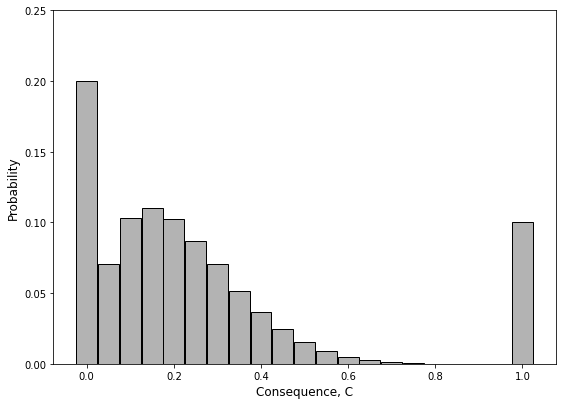

In [5]:
# Four-parameter beta
dx = 0.001;
x = np.arange(0, 1+dx, dx)

# parameter values
r = 2
q = 7
p_0 = 0.2
p_1 = 0.1

# continuous part of the distribution
f_z = (1 - p_0 - p_1) * beta.pdf(x,r,q);

# Discretize
dxDisc = 0.05
xDisc = np.arange(0.05, dxDisc+0.95, dxDisc)
f_zCout = []
for i in range(xDisc.size): # aggregate probabilities
    idx = np.nonzero((x>xDisc[i]-0.5*dxDisc) &  (x<=xDisc[i]+0.5*dxDisc))  # relevant range of x values
    f_zCout.append(np.sum(f_z[idx]) * dx)

f_z[0] = p_0;
f_z[1] = p_1;
      
# Plot Fig 9.5
plt.figure(3)
plt.figure(figsize=(9, 6.5))
plt.bar(xDisc, f_zCout, width=0.048, edgecolor='k', color=[0.7, 0.7, 0.7])
plt.bar([0,1], [p_0,p_1], width=0.048, edgecolor='k', color=[0.7, 0.7, 0.7])
# plt.xlim(0, 1)
plt.ylim(0, 0.25)
plt.xlabel('Consequence, C', fontsize=12)
plt.ylabel('Probability',fontsize=12)